# **Seminar 1 - Computer Vision**
*Naumov Anton (Any0019)*

*To contact me in telegram: @any0019*

## 1. Understanding convolutional (conv) layers

### 1.1 Why do we need to understand this?

1. **Model parameters** $\longrightarrow$ How many params will model have if we'll use this conv layer, and what if we'll use 3 conv layers of one type, 10 of second type and 20 of third one? We can theoretically compute and analyze this things without any additional tools
2. **$\Delta H, \Delta W, \Delta C$** $\longrightarrow$ What will happen to the image after going through this conv layer? Especially important when you want to stack **a lot** of them one after another or create atypical architecture
3. **Receptive field** $\longrightarrow$ How to interpret model results and find what went wrong, or how exactly model solved the case? How big of a patterns model can phisically capture?
4. **It's not just magic!** $\longrightarrow$ **It's cooler, it's mathematical magic!!!** And you can calculate and compute it in any way you want

### 1.2 Conv layer params

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

input: $H \times W \times C_{in}$

1. Kernel\_size $\longrightarrow$ [$K_{h} \times K_{w}$]
2. Input and output channels $\longrightarrow$ [$C_{in}$, $C_{out}$]
3. Padding $\longrightarrow$ how much zeroes (or other specified elements) should be added on each side of the image [$P$, default 0]
4. Stride $\longrightarrow$ distance between two adjacent positions of the kernel on the original image [$S$, default 1]
5. Dilation $\longrightarrow$ distance between each two adjacent elements inside the kernel [$D$, default 1]
6. Bias $\longrightarrow$ linear addition to each output channel [$B$, default True]

output: $H' \times W' \times C_{out}$

<ul>
<title><strong>Convolutional layer:</strong></title>
<img src=https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif alt="Convolutional layer" width="30%"/>

<title><strong>Padding:</strong></title>
<img src=https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif alt="Padding" width="30%"/>
</ul>

<ul>
<title><strong>Stride:</strong></title>
<img src=https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif alt="Stride" width="30%"/>

<title><strong>Dilation:</strong></title>
<img src=https://miro.medium.com/max/395/0*7LCdr8W3gSQdnlSC.gif alt="Dilation" width="30%"/>
</ul>

### 1.3 Model parameters

Depends on $K_h, K_w, C_{in}, C_{out}, B$

Actual kernel, moving across the image, has size $K_h \times K_w \times C_{in}$. Then, for each output channel we have one **different** kernel of this size and one bias value, if $B = \text{true}$

So, weights, corresponding to one convolutional layers are: $$((K_h * K_w * C_{in}) + B) * C_{out}$$

### 1.4 $\Delta$ sizes

Depends on everything, except bias

Basically kernel of actual width $w'$ will substract $w'-1$ from original image (only $W - w' + 1$ possitions horizontally to put kernel)

What is actual width of the kernel $w'$?  It's $w' = (K_w - 1) * D + 1$, because with dilation we're making kernel bigger, without adding any additional parameters, but instead making kernel sparse

Padding adds $P$ extra elements on both sides of the image. So, if $P \neq 0$ then $W = W + 2 P$

With stride we ignore some of the available positions of the actual kernel to increase computational efficiency $W = \Big\lfloor \frac{W - 1}{S} + 1 \Big\rfloor$

Summarizing everything before: $$W' = \Bigg\lfloor \frac{W + 2 P - D (K_w - 1) - 1}{S} + 1 \Bigg\rfloor$$

Exactly the same applies to $H \rightarrow H'$

$C_{out}$ is set manullay and does not depend on anything else

### 1.5 Receptive field

How much of a pattern model can possibly see? 

If convolutional model has only one layer, then the biggest possible pattern that model can capture is $K_h \times K_w$

If we'll use many small kernels consecutively, the last layer will be able to capture a patterns way bigger then it's kernel size. Receptive field - zone, from which a particular neuron actually takes information

And... that's exactly the reason why we **STACK MORE LAYERS!!!** $\longrightarrow$ it's just cheaper and more effective to have few small kernels, instead of one big

**Simple example**:

<img src=https://www.baeldung.com/wp-content/uploads/sites/4/2021/07/Capture1.png alt="Receptive field" width="30%" height="200"/>

So, how can we calculate it's size ourselves?

For fixated neuron on layer $L$ it's receptive field on this layer equals 1. Then, recursively, each previous layer's receptive field size ($r_{l-1}$) for neuron on layer $L$ depends on kernel size ($k_l$) and stride ($s_{l}$) of conv layer applied after previous layer and this layer's receptive field size ($r_{l}$):
$$r_{L} = 1; \quad r_{l-1} = s_l r_l + (k_l - s_l)$$ 

$$\text{Analytical formula}: \quad r_0 = \sum\limits_{l=1}^{L} \bigg( (k_l - 1) \prod\limits_{i=1}^{l-1} s_i \bigg) + 1$$

### 1.6 Intermediate representations (will be more in part 6)

Sometimes it's very useful to see what model actually is looking for in the image, on which parts or patterns does it activates

It helps with understanding of a model

## 2. Short intro to PyTorch (only required for this seminar)

https://disk.yandex.ru/i/O3mQ76u43So3h9 (лекция Ежа)

1. Kinda similar to numpy in syntax, but instead of np.array uses torch.tensor
2. Automatically and dynamically builds computational graph
3. Built-in gradients and backpropagation
4. A lot of NN-related stuff, like NN layers, optimizers, schedulers, dataloader, ...
5. Have a really great set of documentations https://pytorch.org/docs/stable/index.html
6. And even tutorials https://pytorch.org/tutorials/beginner/basics/intro.html

### 2.1 Tensors

In [757]:
#!g1.2
import torch

m = [[0, 1], [2, 3]]
mt = torch.tensor(m)
print(mt)

m2 = np.array(m)
m2t = torch.from_numpy(m2)
print(m2t)

tensor([[0, 1],
        [2, 3]])
tensor([[0, 1],
        [2, 3]])


In [740]:
#!g1.2
mt.shape

torch.Size([2, 2])

In [743]:
#!g1.2
print(mt.sum(dim=-1))
print(mt.type(torch.DoubleTensor).sin())
print(mt.type(torch.FloatTensor).log())

tensor([1, 5])
tensor([[0.0000, 0.8415],
        [0.9093, 0.1411]], dtype=torch.float64)
tensor([[  -inf, 0.0000],
        [0.6931, 1.0986]])


In [744]:
#!g1.2
mt.requires_grad

False

In [745]:
#!g1.2
r = mt.detach().numpy()  # --> get numpy values from tensor vector
# r = mt.item()  # --> get numpy value from tensor scalar

### 2.2 Datasets & Dataloaders

In [749]:
#!g1.2

# Datasets
from torch.utils.data import Dataset
from torchvision import datasets

# On top of dataset for batching, shuffle, ...
from torch.utils.data import DataLoader

# Augumentations for images
from torchvision import transforms as tr

In [748]:
#!g1.2
class MyDataset(Dataset):
    def __init__(self):
        pass
    
    def __len__(self):
        pass
    
    def __getitem__(self, idx):
        pass

In [ ]:
#!g1.2

# # Usual use-case:

# dataset_ = MyDataset()
# dataloader_ = DataLoader(dataset_, batch_size=16, shuffle=True)
# for ...:
#     dataiter_ = iter(dataloader_)
#     for (xs, ys, ...) in dataiter_:
#         # xs --> batch of x as tensor of shape (batch_size, *x.shape)
#         # do stuff

### 2.3 Neural Networks

In [750]:
#!g1.2

# Neural networks layers
from torch import nn

# Some stuff as functions (not layers or anything else)
import torch.nn.functional as F

# Optimizers and lr_schedulers
from torch import optim

**We will talk more about all of this further with examples**

## 3. Let's have some fun with different data

### 3.1 Downloading data

Downloading different datasets using https://pytorch.org/vision/stable/datasets.html

In [759]:
#!g1.2
from torchvision import datasets
from IPython.display import clear_output
import os
from datetime import datetime 

download_dir = './datasets'

all_datasets = [
    'CIFAR10',
    'CIFAR100',
    'FashionMNIST',
    'KMNIST',
    'MNIST',
    'STL10',
    'SVHN',
#     'CelebA'  # may give an error because of google drive, will write block to download manually if this will not work
]

val_data = dict()
data = dict()
download_time = dict()
for i, dataset_name in enumerate(all_datasets):
    clear_output(True)
    start_time = datetime.now() 
    
    print(f'{i+1}/{len(all_datasets)}: Downloading dataset {dataset_name}')
    
    download = not os.path.isdir(f'{download_dir}/{dataset_name}')
    download_exec = f'data[dataset_name] = datasets.{dataset_name}(root=\'{os.path.join(download_dir, dataset_name)}\', download={download})'
    if dataset_name not in {'CelebA', 'STL10', 'SVHN'}:
        download_val_exec = f'val_data[dataset_name] = datasets.{dataset_name}(root=\'{os.path.join(download_dir, dataset_name)}\', download={download}, train=False)'
    else:
        download_val_exec = f'val_data[dataset_name] = datasets.{dataset_name}(root=\'{os.path.join(download_dir, dataset_name)}\', download={download}, split=\'test\')'
    
    # NEVER REPEAT THIS AT HOME
    exec(download_exec)
    exec(download_val_exec)
    download_time[dataset_name] = datetime.now() - start_time

clear_output(True)
print('Download time:')
for k, v in download_time.items():
    print('{: <12} ~ {}'.format(k, v))

Download time:
CIFAR10      ~ 0:00:23.592588
CIFAR100     ~ 0:00:18.831811
FashionMNIST ~ 0:00:17.818167
KMNIST       ~ 0:00:36.677788
MNIST        ~ 0:00:07.326961
STL10        ~ 0:05:33.259542
SVHN         ~ 0:01:08.130490


### 3.2 Let's look on our data

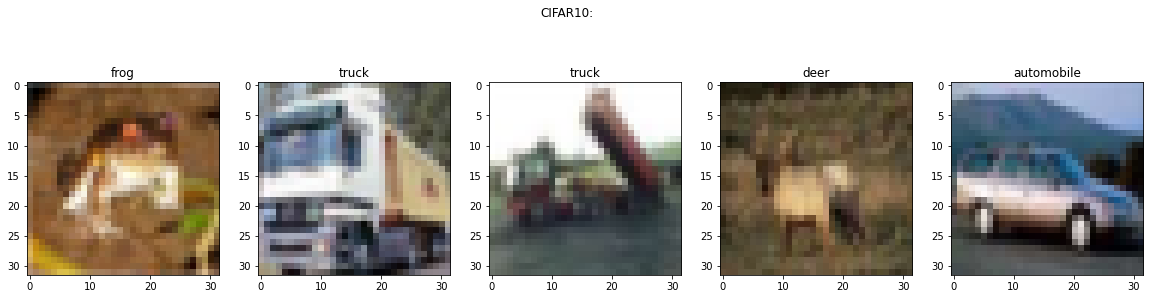

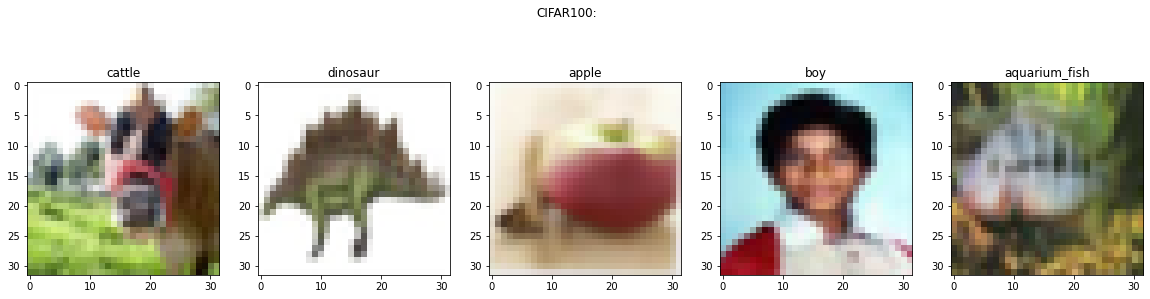

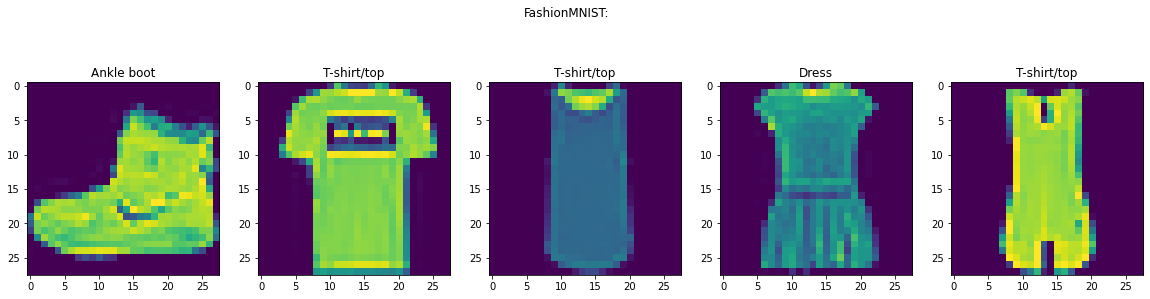

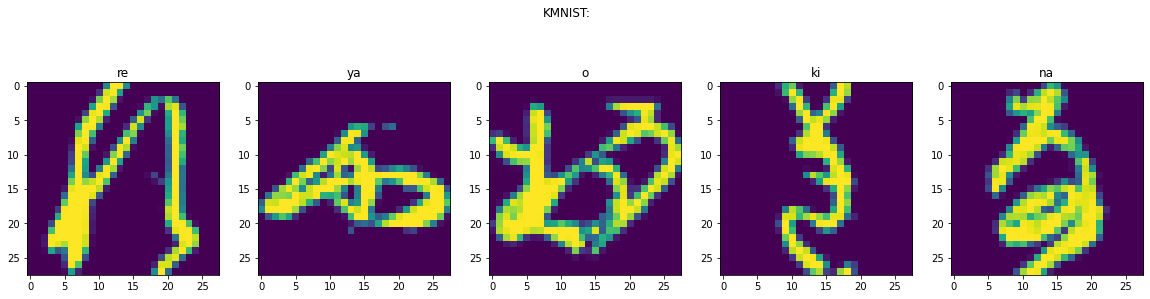

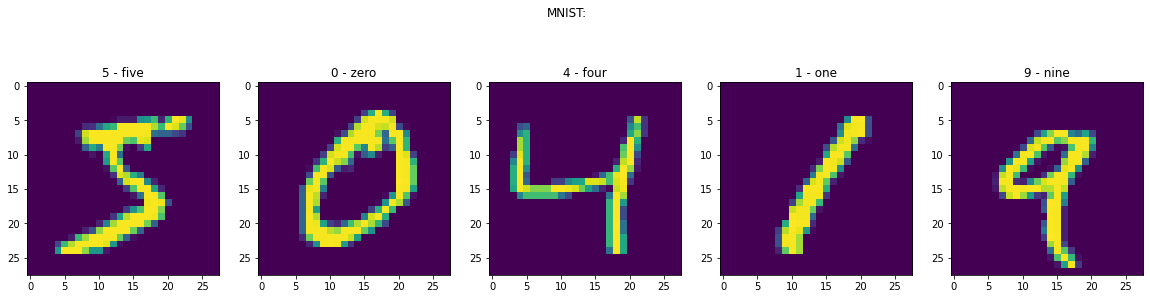

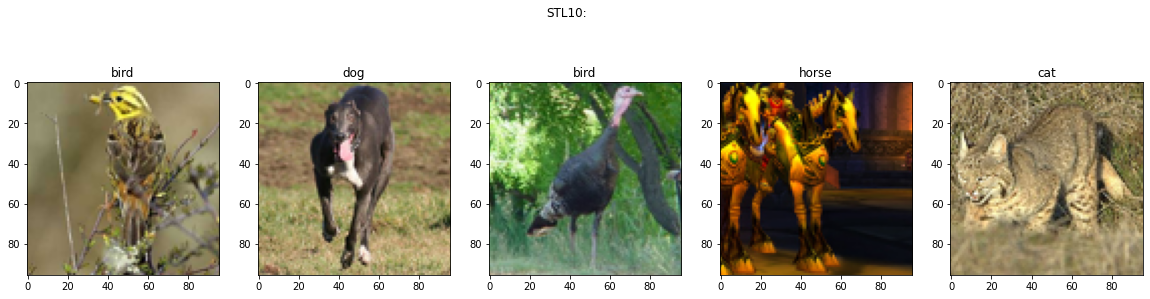

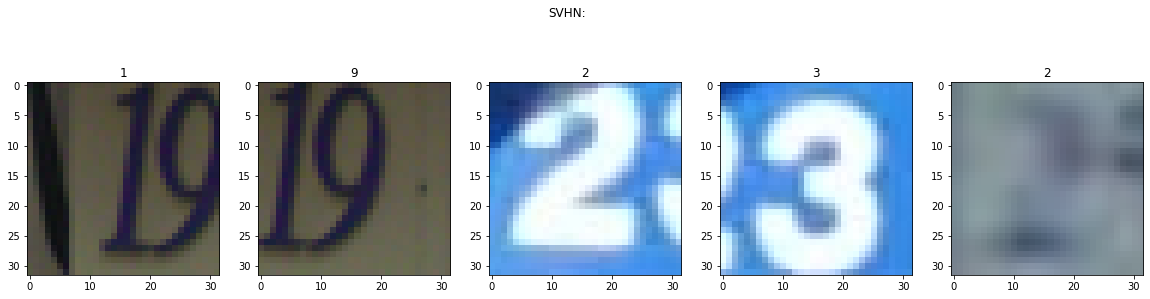

In [760]:
#!g1.2
import matplotlib.pyplot as plt
%matplotlib inline

h = 1
w = 5

for dataset_name in data:    
    fig, ax = plt.subplots(h, w, figsize=(20, 5 * h))
    fig.suptitle(f'{dataset_name}:')
    for i, el in enumerate(data[dataset_name]):
        if i >= h * w:
            break
        plt.subplot(h, w, i + 1)
        plt.imshow(el[0])
        if isinstance(el[1], int):
            try:
                plt.title(data[dataset_name].classes[el[1]])
            except:
                plt.title(el[1])
    plt.show()

### 3.3 Making dataloaders

In [761]:
#!g1.2
class AddTransformsDataset:
    # Class to add custom transforms to any dataset (except 'CelebA') before creating dataloader
    def __init__(self, dataset, transforms=None):
        self.dataset = dataset
        self.transforms = transforms
        
        # Getting classes from dataset
        if hasattr(self.dataset, 'classes'):
            self.clss = self.dataset.classes
        else:
            self.clss = [i for i in range(10)]
    
    def __len__(self) -> int:
        return self.dataset.__len__()
    
    def classes(self):
        return self.clss
    
    def __getitem__(self, index: int):
        image, label = self.dataset.__getitem__(index)
        if self.transforms:
            image = self.transforms(image)
        return image, label

In [762]:
#!g1.2
from torchvision import transforms as tr
from torch.utils.data import DataLoader

def my_transform():
    return tr.Compose([
        tr.ToTensor(),
    ])

def make_dataloaders(data, batch_size=16, transform_function=None, datasets_to_exclude=set(), val=False):
    dataloaders = dict()
    classes = dict()
    if isinstance(datasets_to_exclude, (str, list, tuple)):
        datasets_to_exclude = set(datasets_to_exclude)
    
    for dataset_name in data.keys() - {'CelebA'} - datasets_to_exclude:
        ds = AddTransformsDataset(data[dataset_name], transform_function())
        dataloaders[dataset_name] = DataLoader(
            ds,
            batch_size=batch_size,
            shuffle=(not val),
            drop_last=(not val)
        )
        classes[dataset_name] = ds.classes()
    return dataloaders, classes

In [763]:
#!g1.2
# dataloaders = make_dataloaders(..., 16, my_transform, set(all_datasets) - {'CIFAR10'}, val=...)  # if you want to make a dataloader for only CIFAR10
dataloaders, classes = make_dataloaders(data, 16, my_transform)
val_dataloaders, _ = make_dataloaders(val_data, 16, my_transform, val=True)

In [764]:
#!g1.2
dataloaders.keys()

dict_keys(['STL10', 'MNIST', 'KMNIST', 'SVHN', 'CIFAR100', 'CIFAR10', 'FashionMNIST'])

In [765]:
#!g1.2
for dataset_name in dataloaders:
    imgs_batch, lbls_batch = next(iter(dataloaders[dataset_name]))
    print(f'shapes for {dataset_name}:\n--images_batch: {imgs_batch.shape},\n--labels_batch: {lbls_batch.shape}\n')

shapes for STL10:
--images_batch: torch.Size([16, 3, 96, 96]),
--labels_batch: torch.Size([16])

shapes for MNIST:
--images_batch: torch.Size([16, 1, 28, 28]),
--labels_batch: torch.Size([16])

shapes for KMNIST:
--images_batch: torch.Size([16, 1, 28, 28]),
--labels_batch: torch.Size([16])

shapes for SVHN:
--images_batch: torch.Size([16, 3, 32, 32]),
--labels_batch: torch.Size([16])

shapes for CIFAR100:
--images_batch: torch.Size([16, 3, 32, 32]),
--labels_batch: torch.Size([16])

shapes for CIFAR10:
--images_batch: torch.Size([16, 3, 32, 32]),
--labels_batch: torch.Size([16])

shapes for FashionMNIST:
--images_batch: torch.Size([16, 1, 28, 28]),
--labels_batch: torch.Size([16])



## 4. Building our first model and learning pipeline

### 4.1 Linear model (no conv layers)

In [766]:
#!g1.2
import numpy as np
from torch import nn
from collections import OrderedDict

class simple_net(nn.Module):
    """
        Simple linear network
    """
    def __init__(self, input_size, num_layers, hidden_sizes, activations, dropouts, output_size):
        super(simple_net, self).__init__()
        
        if not isinstance(hidden_sizes, list):
            hidden_sizes = [hidden_sizes] * num_layers
        assert len(hidden_sizes) == num_layers, f'provide {num_layers} hidden_sizes or just one for all layers'
        
        if not isinstance(activations, list):
            activations = [activations] * num_layers
        assert len(activations) == num_layers, f'provide {num_layers} activation functions or just one for all layers'
        
        if not isinstance(dropouts, list):
            dropouts = [dropouts] * num_layers
        assert len(dropouts) == num_layers, f'provide {num_layers} dropout values or just one for all layers'
        
        flat = ('flat', nn.Flatten())
        in_to_hid = ('in2hid', nn.Linear(input_size, hidden_sizes[0]))
        
        hid_ = [[
            (f'act_{i+1}', activations[i]),
            (f'drop_{i+1}', nn.Dropout(dropouts[i])),
            (f'hid_{i+1}', nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        ] for i in range(num_layers-1)]
        hid = []
        for el in hid_:
            hid.extend(el)
        
        head = [
            (f'act_{num_layers}', activations[-1]),
            (f'drop_{num_layers}', nn.Dropout(dropouts[-1])),
            ('hid2out', nn.Linear(hidden_sizes[-1], output_size)),
            ('log-softmax', nn.LogSoftmax(dim=-1))
        ]
        
        self.net = [flat, in_to_hid, *hid, *head]
        self.net = nn.Sequential(OrderedDict(self.net))
    
    def forward(self, imgs):
        return self.net(imgs)

In [767]:
#!g1.2
# Example for CIFAR10
model_lin = simple_net(
    input_size = 3*32*32,
    num_layers = 3,
    hidden_sizes = [100, 100, 30],
    activations = nn.Tanh(),
    dropouts = 0.2,
    output_size = 10
)

print('Model:', model_lin, sep='\n')

imgs_batch, lbls_batch = next(iter(dataloaders['CIFAR10']))

print(f'\nInput shape: {imgs_batch.shape}')
out = model_lin(imgs_batch)
print(f'Output shape: {out.shape}')

print(f'\nChecking that returned log-probabilities (all exp-sums must be close to 1)', out.exp().sum(-1).detach().numpy(), sep='\n')

Model:
simple_net(
  (net): Sequential(
    (flat): Flatten(start_dim=1, end_dim=-1)
    (in2hid): Linear(in_features=3072, out_features=100, bias=True)
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (hid_1): Linear(in_features=100, out_features=100, bias=True)
    (act_2): Tanh()
    (drop_2): Dropout(p=0.2, inplace=False)
    (hid_2): Linear(in_features=100, out_features=30, bias=True)
    (act_3): Tanh()
    (drop_3): Dropout(p=0.2, inplace=False)
    (hid2out): Linear(in_features=30, out_features=10, bias=True)
    (log-softmax): LogSoftmax(dim=-1)
  )
)

Input shape: torch.Size([16, 3, 32, 32])
Output shape: torch.Size([16, 10])

Checking that returned probabilities (all sums must be close to 1)
[0.9999999  1.0000001  0.99999994 1.         1.         1.
 1.         1.0000001  1.0000001  1.         1.0000001  0.9999999
 0.99999994 0.99999994 0.9999999  1.        ]


In [768]:
#!g1.2
# Counting how many parameters does our model have
def model_num_params(model):
    sum_params = 0
    for param in model.named_parameters():
        num_params = np.prod(param[1].shape)
        print('{: <19} ~  {: <7} params'.format(param[0], num_params))
        sum_params += num_params
    print(f'\nIn total: {sum_params} params')
    return sum_params

sum_params = model_num_params(model_lin)

net.in2hid.weight   ~  307200  params
net.in2hid.bias     ~  100     params
net.hid_1.weight    ~  10000   params
net.hid_1.bias      ~  100     params
net.hid_2.weight    ~  3000    params
net.hid_2.bias      ~  30      params
net.hid2out.weight  ~  300     params
net.hid2out.bias    ~  10      params

In total: 320740 params


### 4.2 Optimizer

In [769]:
#!g1.2
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

def create_model_and_optimizer(model_class, model_params, lr=1e-3, beta1=0.9, beta2=0.999, device=device):
    model = model_class(**model_params)
    model = model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr, [beta1, beta2])
    return model, optimizer

In [772]:
#!g1.2
model_params = {
    'input_size': 3*32*32,
    'num_layers': 3,
    'hidden_sizes': [100, 100, 30],
    'activations': nn.LeakyReLU(0.2),
    'dropouts': 0.2,
    'output_size': 10
}

model, optimizer = create_model_and_optimizer(
    model_class = simple_net, 
    model_params = model_params,
    lr = 1e-3
)

### 4.3 Train/val one epoch

In [773]:
#!g1.2
import torch.nn.functional as F
from tqdm.notebook import tqdm

criterion = nn.NLLLoss()

def train(model, optimizer, loader, criterion):
    model.train()
    losses_tr = []
    for images, targets in tqdm(loader):
        images = images.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        out = model(images)
        loss = criterion(out, targets)
        
        loss.backward()
        optimizer.step()
        losses_tr.append(loss.item()) 
    
    return model, optimizer, np.mean(losses_tr)

def val(model, loader, criterion):
    model.eval()
    losses_val = []
    with torch.no_grad():
        for images, targets in tqdm(loader):
            images = images.to(device)
            targets = targets.to(device)
            out = model(images)
            loss = criterion(out, targets)

            losses_val.append(loss.item())
    
    return np.mean(losses_val)

### 4.4 Learning loop

In [774]:
#!g1.2
from IPython.display import clear_output
from tqdm.notebook import trange


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def learning_loop(model, optimizer, train_loader, val_loader, criterion, scheduler=None, min_lr=None, epochs=10, val_every=1, draw_every=1, separate_show=False):
    losses = {'train': [], 'val': []}

    for epoch in range(1, epochs+1):
        print(f'#{epoch}/{epochs}:')
        model, optimizer, loss = train(model, optimizer, train_loader, criterion)
        losses['train'].append(loss)

        if not (epoch % val_every):
            loss = val(model, val_loader, criterion)
            losses['val'].append(loss)
            if scheduler:
                scheduler.step(loss)

        if not (epoch % draw_every):
            clear_output(True)
            fig, ax = plt.subplots(1, 2 if separate_show else 1, figsize=(20, 10))
            fig.suptitle(f'#{epoch}/{epochs}:')

            if separate_show:
                plt.subplot(121)
                plt.title('loss on train')
            plt.plot(losses['train'], 'r.-', label='train')
            plt.legend()

            if separate_show:
                plt.subplot(122)
                plt.title('loss on validation')
            else:
                plt.title('losses')
            plt.plot(losses['val'], 'g.-', label='val')
            plt.legend()
            
            plt.show()
        
        if min_lr and get_lr(optimizer) <= min_lr:
            print(f'Learning process ended with early stop after epoch {epoch}')
            break
    
    return model, optimizer, losses

### 4.5 Training linear model

In [775]:
#!g1.2
model_params = dict()
model = dict()
optimizer = dict()
scheduler = dict()
criterion = dict()
losses = dict()

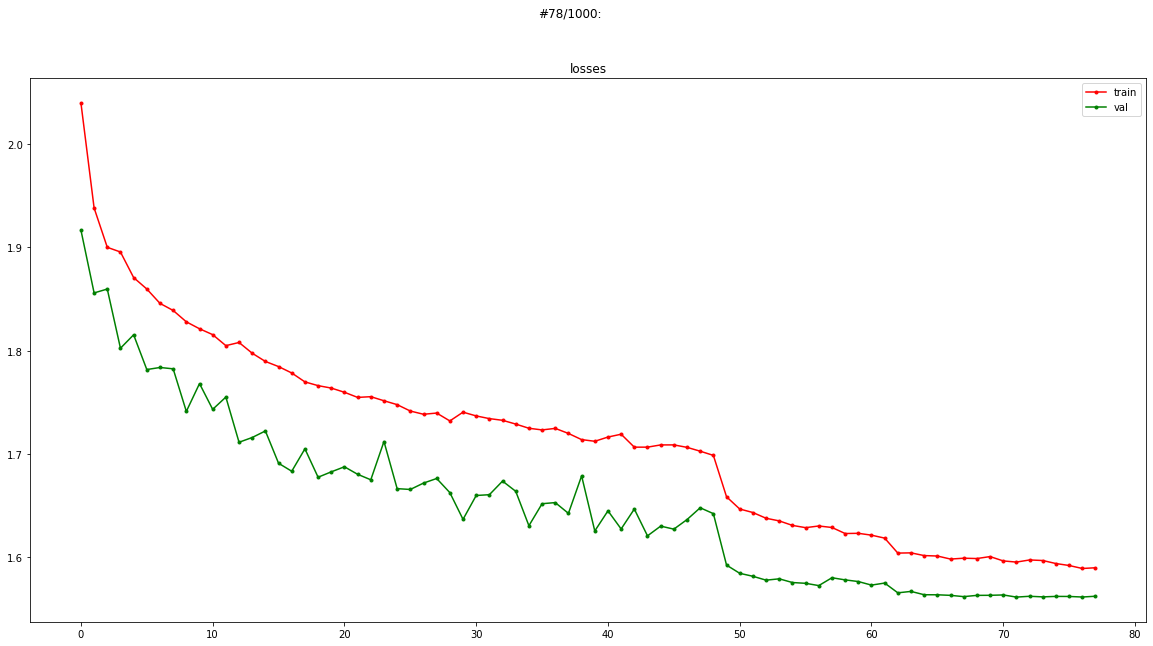

Learning process ended with early stop after epoch 78
CPU times: user 15min 37s, sys: 30.7 s, total: 16min 8s
Wall time: 16min 31s


In [776]:
#!g1.2
%%time

chosen_dataset = 'CIFAR10'
model_type = 'simple'
imgs_batch, lbls_batch = next(iter(dataloaders[chosen_dataset]))
num_classes = len(classes[chosen_dataset])

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

model_params[model_type] = {
    'input_size': np.prod(imgs_batch.shape[1:]),
    'num_layers': 3,
    'hidden_sizes': [100, 100, 30],
    'activations': nn.Tanh(),
    'dropouts': 0.2,
    'output_size': num_classes
}

model[model_type], optimizer[model_type] = create_model_and_optimizer(
    model_class = simple_net, 
    model_params = model_params[model_type],
    lr = 5e-4,
    device = device,
)

scheduler[model_type] = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer[model_type], mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)

criterion[model_type] = nn.NLLLoss()

model[model_type], optimizer[model_type], losses[model_type] = learning_loop(
    model = model[model_type],
    optimizer = optimizer[model_type],
    train_loader = dataloaders[chosen_dataset],
    val_loader = val_dataloaders[chosen_dataset],
    criterion = criterion[model_type],
    scheduler = scheduler[model_type],
    epochs = 1000,
    min_lr = 2e-6
)

# if device != 'cpu':
#     model[model_type] = model[model_type].to('cpu')

### 4.6 Looking at the results

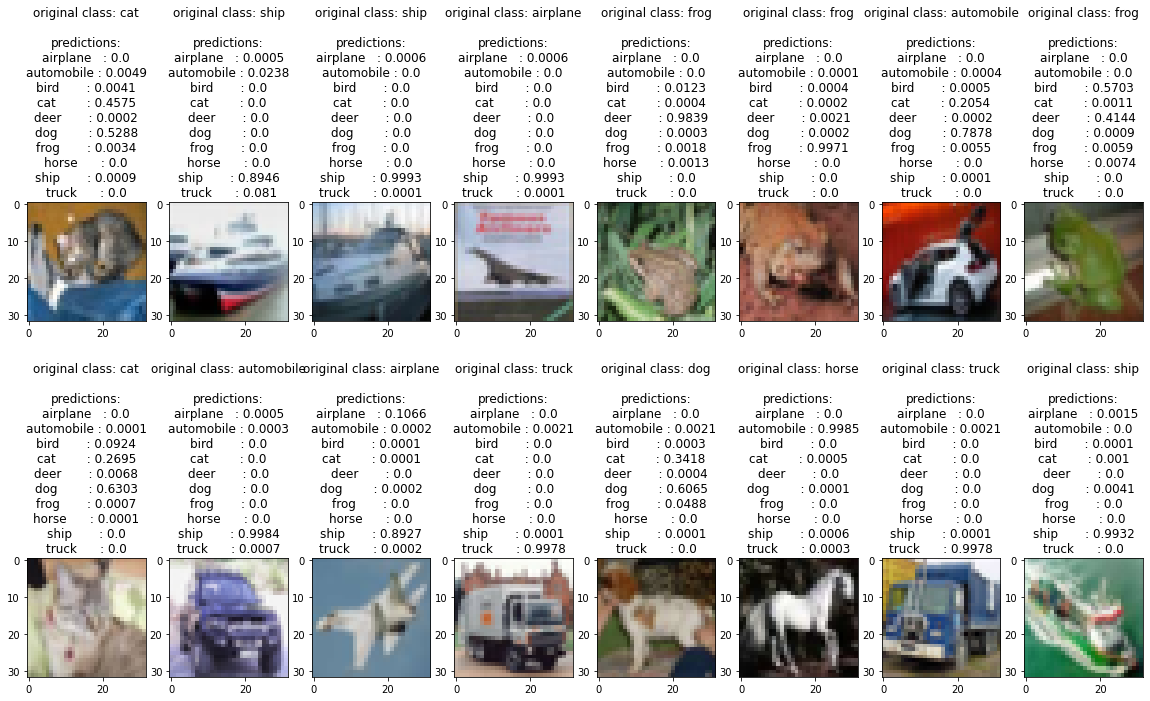

In [582]:
#!g1.2
def show_results(model, val_loader, class_labels):
    with torch.no_grad():
        imgs_batch, lbls_batch = next(iter(val_loader))
        preds = model(imgs_batch.to(device)).exp()

        plt.subplots(2, 8, figsize=(20, 12))
        for i in range(imgs_batch.shape[0]):
            plt.subplot(2, 8, i+1)
            plt.imshow(imgs_batch[i,:,:,:].numpy().transpose(1, 2, 0)[:,:,0])
            title = f'original class: {class_labels[lbls_batch[i]]}\n\npredictions:'
            for j, pred in enumerate(preds[i,:]):
                title += '\n{: <10} : {}'.format(class_labels[j], round(preds[i,j].item(), 4))
            plt.title(title)
        plt.show()

show_results(model[model_type], val_dataloaders[chosen_dataset], classes[chosen_dataset])

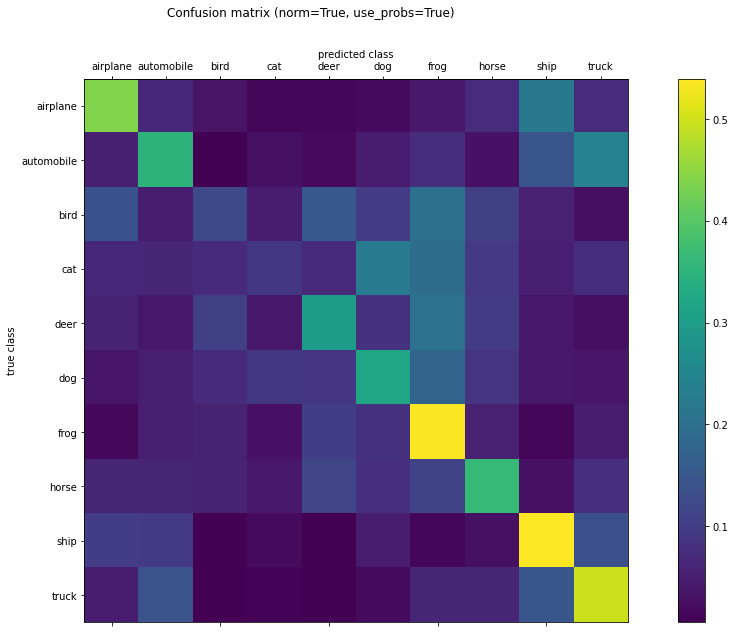

In [583]:
#!g1.2
def real_confusion_matrix(model, val_loader, class_labels, use_probs=False, normalize=True):
    with torch.no_grad():
        n_classes = len(class_labels)
        conf_matrix = np.zeros((n_classes, n_classes))
        for i, (images, labels) in enumerate(tqdm(val_loader)):
            probs = model(images.to(device)).exp()
            if use_probs:
                for j in range(images.shape[0]):
                    for c in range(n_classes):
                        conf_matrix[labels[j].item(), c] += probs[j,c]
            else:
                _, pred_classes = torch.max(probs, 1)
                for j in range(images.shape[0]):
                    conf_matrix[labels[j].item(), pred_classes[j].item()] += 1.
        
        if normalize:
            conf_matrix /= conf_matrix.sum(1)
        
        fig = plt.figure(figsize=(18, 10))
        fig.suptitle(f'Confusion matrix (norm={normalize}, use_probs={use_probs})')
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_matrix)
        fig.colorbar(cax)
        
        ax.xaxis.set_major_formatter('')
        secax = ax.secondary_xaxis('top')
        secax.xaxis.set_ticks(list(range(len(class_labels))))
        secax.xaxis.set_ticklabels(class_labels)
        secax.set_xlabel('predicted class')
        
        ax.yaxis.set_ticks(list(range(len(class_labels))))
        ax.yaxis.set_ticklabels(class_labels)
        ax.set_ylabel('true class')
        
        plt.show()
        
        return conf_matrix

pcm = real_confusion_matrix(model[model_type], val_dataloaders[chosen_dataset], classes[chosen_dataset], use_probs=True, normalize=True)

## 5. Trying convolutions

### 5.1 Model

In [570]:
#!g1.2
import numpy as np
from torch import nn
from collections import OrderedDict

class conv_net(nn.Module):
    """
        Simple convolutional network
    """
    def __init__(self, input_size, num_layers, kernel_sizes, hidden_sizes, activations, dropouts, output_size):
        super(conv_net, self).__init__()
        
        if not isinstance(kernel_sizes, list):
            kernel_sizes = [kernel_sizes] * num_layers
        assert len(kernel_sizes) == num_layers, f'provide {num_layers} kernel_sizes or just one for all layers'
        
        if not isinstance(hidden_sizes, list):
            hidden_sizes = [hidden_sizes] * num_layers
        assert len(hidden_sizes) == num_layers, f'provide {num_layers} hidden_sizes or just one for all layers'
        
        if not isinstance(activations, list):
            activations = [activations] * num_layers
        assert len(activations) == num_layers, f'provide {num_layers} activation functions or just one for all layers'
        
        if not isinstance(dropouts, list):
            dropouts = [dropouts] * num_layers
        assert len(dropouts) == num_layers, f'provide {num_layers} dropout values or just one for all layers'
        
        in_conv = ('conv_0', nn.Conv2d(input_size[0], hidden_sizes[0], kernel_sizes[0], padding=(kernel_sizes[0]-1)//2))
        
        conv_blocks_ = [[
            (f'act_{i+1}', activations[i]),
            (f'drop_{i+1}', nn.Dropout(dropouts[i])),
            (f'conv_{i+1}', nn.Conv2d(hidden_sizes[i], hidden_sizes[i+1], kernel_sizes[i+1], padding=(kernel_sizes[i+1]-1)//2))
        ] for i in range(num_layers-1)]
        conv_blocks = []
        for el in conv_blocks_:
            conv_blocks.extend(el)
        
        head = [
            (f'act_{num_layers}', activations[-1]),
            (f'drop_{num_layers}', nn.Dropout(dropouts[-1])),
            ('flat', nn.Flatten()),
            ('hid2out', nn.Linear(input_size[1] * input_size[2] * hidden_sizes[-1], output_size)),
            ('log-softmax', nn.LogSoftmax(dim=-1))
        ]
        
        self.net = [in_conv, *conv_blocks, *head]
        self.net = nn.Sequential(OrderedDict(self.net))
    
    def forward(self, imgs):
        return self.net(imgs)

In [571]:
#!g1.2
# Example for CIFAR10
model_conv = conv_net(
    input_size = (3, 32, 32),
    num_layers = 3,
    kernel_sizes = 5,
    hidden_sizes = [16, 16, 8],
    activations = nn.Tanh(),
    dropouts = 0.2,
    output_size = 10
)

print('Model:', model_conv, sep='\n')

imgs_batch, lbls_batch = next(iter(dataloaders['CIFAR10']))

print(f'\nInput shape: {imgs_batch.shape}')
out = model_conv(imgs_batch)
print(f'Output shape: {out.shape}')

print(f'\nChecking that returned probabilities (all sums must be close to 1)', out.exp().sum(-1).detach().numpy(), sep='\n')

Model:
conv_net(
  (net): Sequential(
    (conv_0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (conv_1): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_2): Tanh()
    (drop_2): Dropout(p=0.2, inplace=False)
    (conv_2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_3): Tanh()
    (drop_3): Dropout(p=0.2, inplace=False)
    (flat): Flatten()
    (hid2out): Linear(in_features=20480, out_features=10, bias=True)
    (softmax): Softmax(dim=-1)
  )
)

Input shape: torch.Size([16, 3, 32, 32])
Output shape: torch.Size([16, 10])

Checking that returned probabilities (all sums must be close to 1)
[1.         1.         1.         1.         1.         1.
 0.99999994 1.         1.         1.         1.0000001  1.
 1.         1.         1.0000001  0.99999994]


In [572]:
#!g1.2
# Counting how many parameters does our model have
sum_params = model_num_params(model_conv)

net.conv_0.weight   ~  1500    params
net.conv_0.bias     ~  20      params
net.conv_1.weight   ~  10000   params
net.conv_1.bias     ~  20      params
net.conv_2.weight   ~  10000   params
net.conv_2.bias     ~  20      params
net.hid2out.weight  ~  204800  params
net.hid2out.bias    ~  10      params

In total: 226370 params


### 5.2 Learning loop

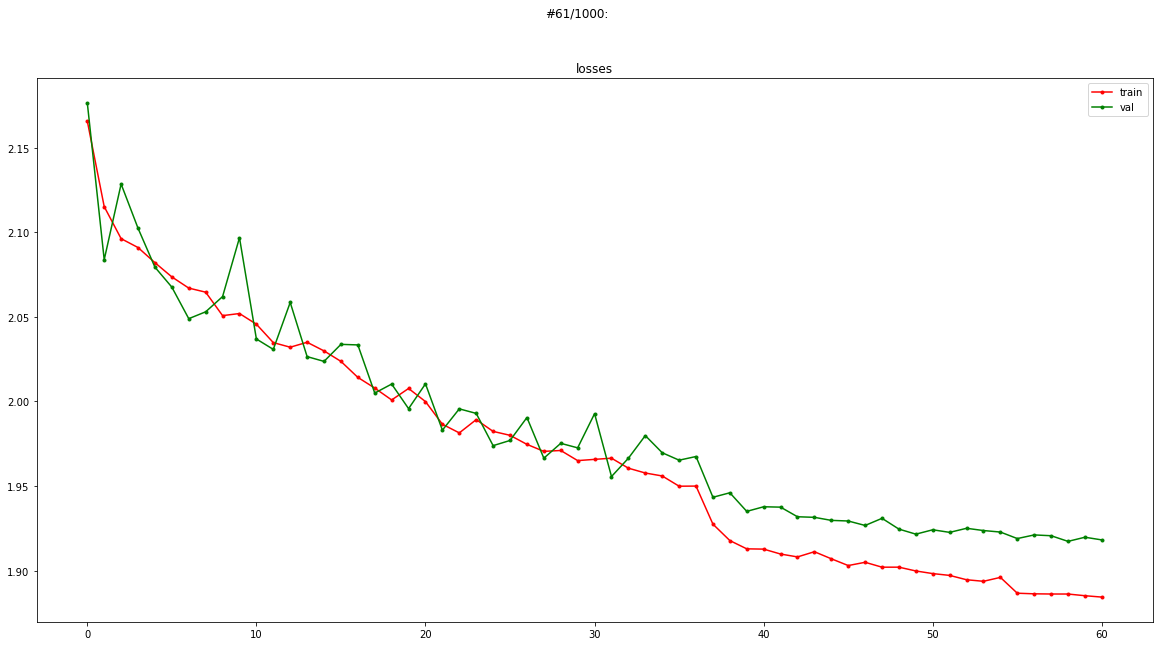

Learning process ended with early stop after epoch 61
CPU times: user 13h 45min 31s, sys: 2min 13s, total: 13h 47min 45s
Wall time: 3h 59min 25s


In [574]:
#!g1.2
%%time

chosen_dataset = 'CIFAR10'
model_type = 'conv_easy'
imgs_batch, lbls_batch = next(iter(dataloaders[chosen_dataset]))
num_classes = len(classes[chosen_dataset])

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

model_params[model_type] = {
    'input_size': imgs_batch.shape[1:],
    'num_layers': 3,
    'kernel_sizes': 5,
    'hidden_sizes': [16, 16, 8],
    'activations': nn.Tanh(),
    'dropouts': 0.2,
    'output_size': num_classes
}

model[model_type], optimizer[model_type] = create_model_and_optimizer(
    model_class = conv_net, 
    model_params = model_params[model_type],
    lr = 5e-4,
    device = device,
)

scheduler[model_type] = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer[model_type], mode='min', factor=0.25, patience=4, threshold=0.001, verbose=True)

criterion[model_type] = nn.NLLLoss()

model[model_type], optimizer[model_type], losses[model_type] = learning_loop(
    model = model[model_type],
    optimizer = optimizer[model_type],
    train_loader = dataloaders[chosen_dataset],
    val_loader = val_dataloaders[chosen_dataset],
    criterion = criterion[model_type],
    scheduler = scheduler[model_type],
    epochs = 1000,
    min_lr = 1e-5
)

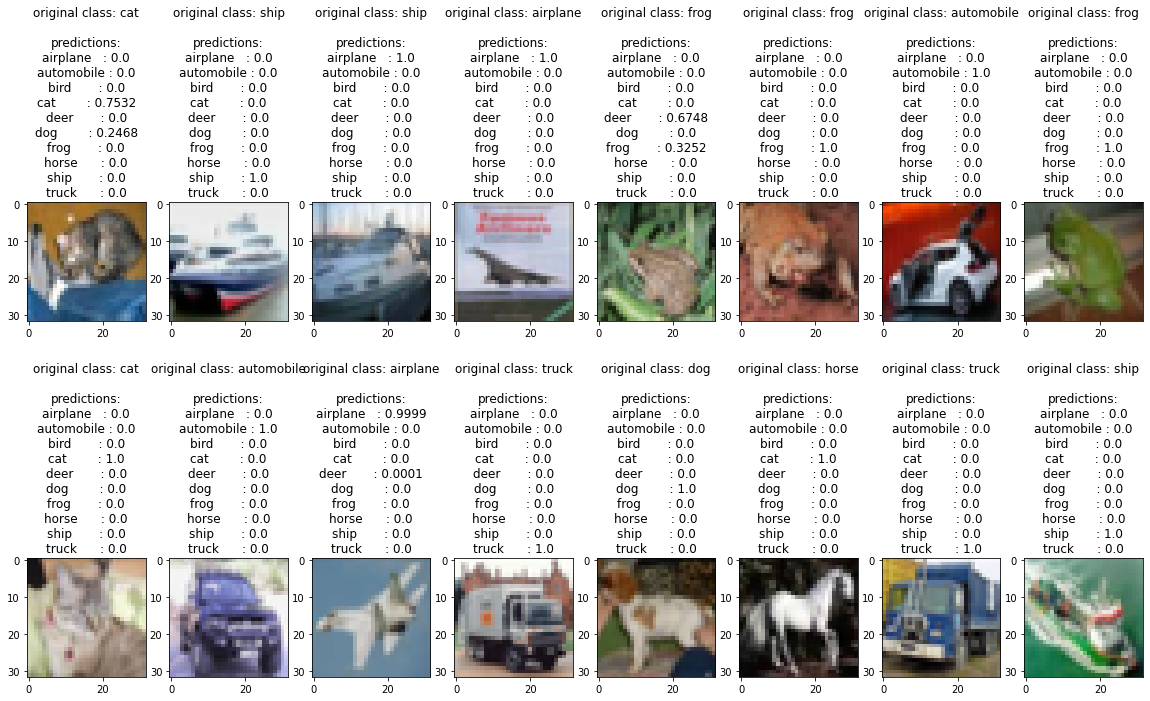

In [575]:
#!g1.2
show_results(model[model_type], val_dataloaders[chosen_dataset], classes[chosen_dataset])

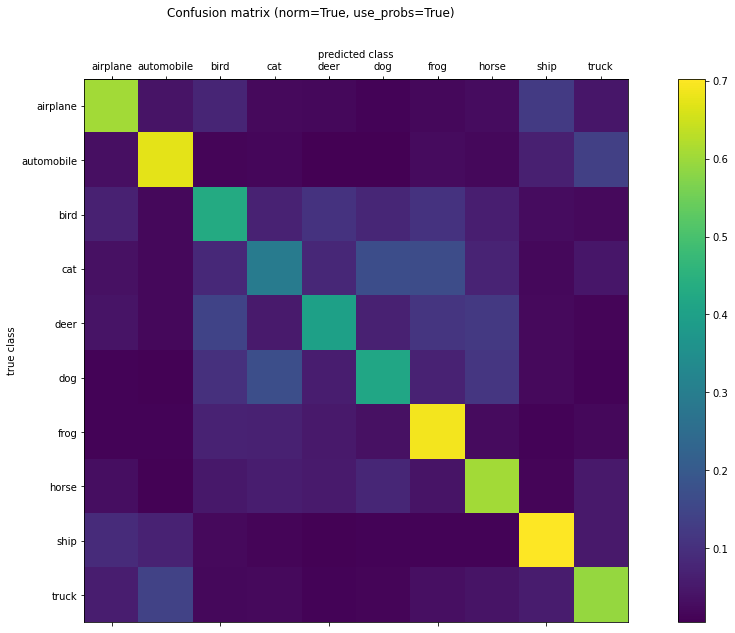

In [576]:
#!g1.2
pcm = real_confusion_matrix(model[model_type], val_dataloaders[chosen_dataset], classes[chosen_dataset], use_probs=True, normalize=True)

## 6. Analyzing results

Few good links

https://distill.pub/2017/feature-visualization $\longrightarrow$ feature visualization

https://yosinski.com/deepvis $\longrightarrow$ deep visualisation toolbox

https://www.programmersought.com/article/23176813233 $\longrightarrow$ visualize the features of CNN

### 6.1 What model looks like inside? Intermediate representation

In [577]:
#!g1.2
mt_lin = 'simple'
mt_conv = 'conv_easy'

In [578]:
#!g1.2
model[mt_lin]

simple_net(
  (net): Sequential(
    (flat): Flatten()
    (in2hid): Linear(in_features=3072, out_features=100, bias=True)
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (hid_1): Linear(in_features=100, out_features=100, bias=True)
    (act_2): Tanh()
    (drop_2): Dropout(p=0.2, inplace=False)
    (hid_2): Linear(in_features=100, out_features=30, bias=True)
    (act_3): Tanh()
    (drop_3): Dropout(p=0.2, inplace=False)
    (hid2out): Linear(in_features=30, out_features=10, bias=True)
    (softmax): Softmax(dim=-1)
  )
)

Per layer intermediate representation of activations for linear model


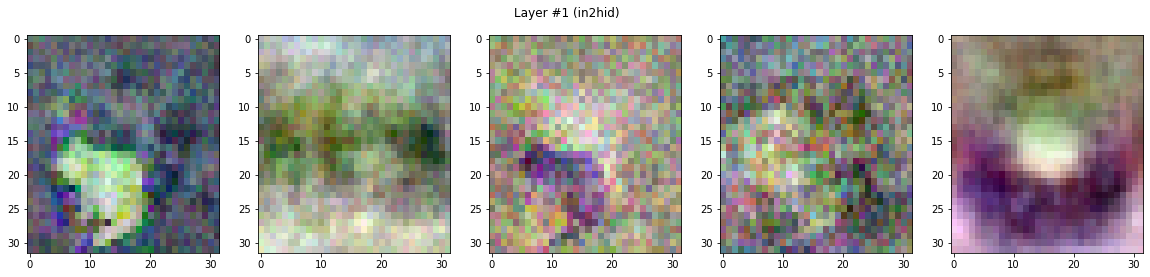

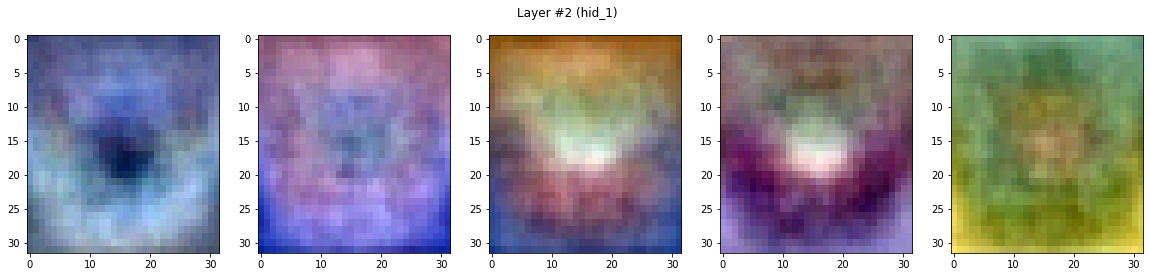

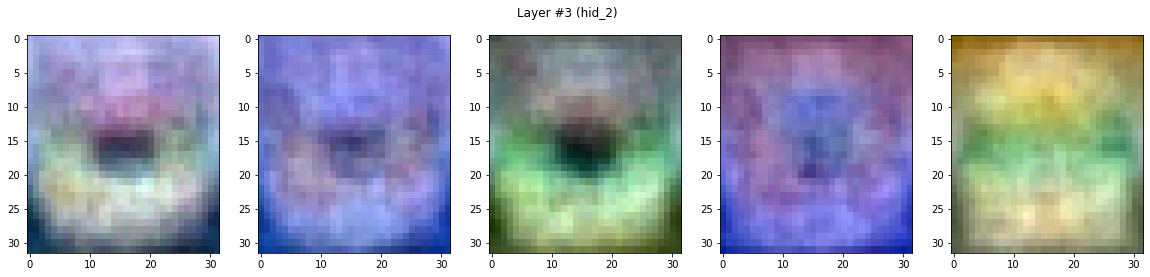

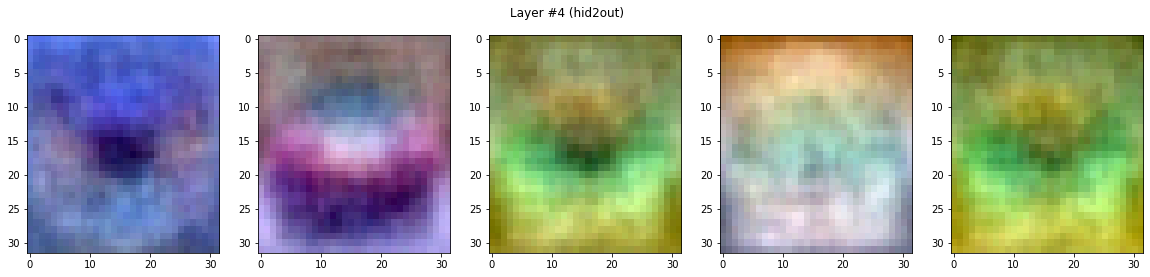

In [727]:
#!g1.2
from termcolor import colored

print(colored('Per layer intermediate representation of activations for linear model', attrs=['bold']))

h, w = 1, 5
with_color = True

with torch.no_grad():
    res = None
    layer_num = 0
    for name, param in list(model[mt_lin].named_parameters()):
        pref = name.split('.')[-1]
        np_data = np.copy(param.data.numpy().T)
        if pref == 'weight':
            layer_num += 1
            if res is not None:
                res = res @ np_data
            else:
                res = np_data

            H = W = np.sqrt(res.shape[0] // 3).astype(np.int) if with_color else np.sqrt(res.shape[0]).astype(np.int)
            internal = np.copy(res.reshape(3 if with_color else 1, H, W, res.shape[-1]))
            internal -= np.min(internal, axis=(0, 1, 2))[None, None, None, :]
            internal /= np.max(internal, axis=(0, 1, 2))[None, None, None, :]

            fig, ax = plt.subplots(h, w, figsize=(4*w, 4*h))
            fig.suptitle(f'Layer #{layer_num} ({name.split(".")[1]})')
            for i in range(h*w):
                plt.subplot(h, w, i+1)
                img_ = internal[:,:,:,i]
                plt.imshow(img_.transpose(1, 2, 0), aspect='auto')
            plt.show()

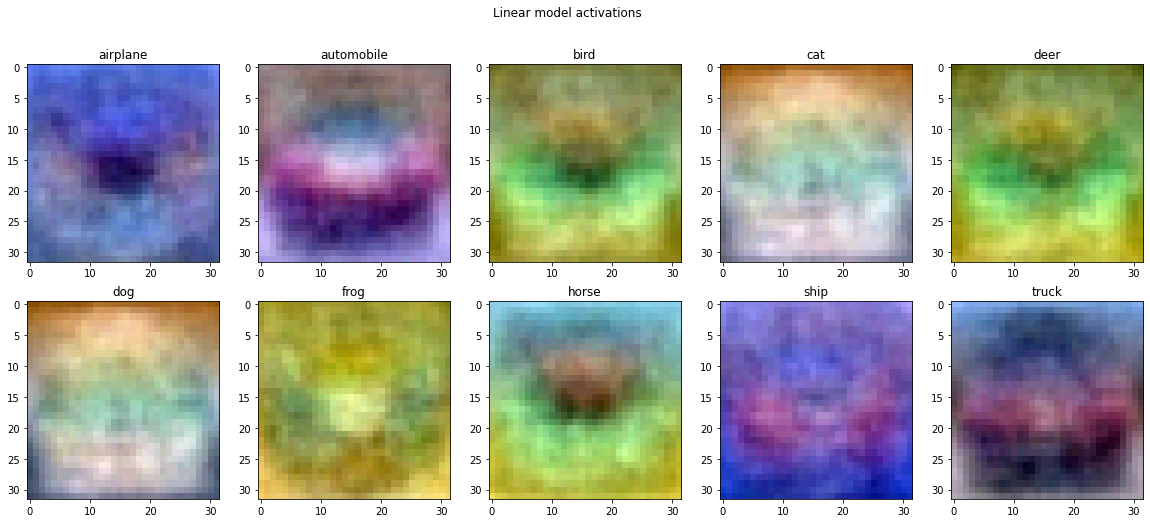

In [728]:
#!g1.2
def kinda_internal_activations(lin_model, with_color=True):
    with torch.no_grad():
        res = None
        for name, param in list(lin_model.named_parameters()):
            pref = name.split('.')[-1]
            np_data = np.copy(param.data.numpy().T)
            if pref == 'weight':
                if res is not None:
                    res = res @ np_data
                else:
                    res = np_data

        H = W = np.sqrt(res.shape[0] // 3).astype(np.int) if with_color else np.sqrt(res.shape[0]).astype(np.int)
        res = res.reshape(3 if with_color else 1, H, W, res.shape[-1])

        res -= np.min(res, axis=(0,1,2))
        res /= np.max(res, axis=(0,1,2))

        return res


res = kinda_internal_activations(model[mt_lin], True)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Linear model activations')
for i in range(res.shape[-1]):
    plt.subplot(2, 5, i+1)
    plt.title(classes[chosen_dataset][i])
    plt.imshow(res[:,:,:,i].transpose(1, 2, 0), aspect='auto')
plt.show()

### 6.2 Convolutional internal representations

In [586]:
#!g1.2
model[mt_conv]

conv_net(
  (net): Sequential(
    (conv_0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_1): Tanh()
    (drop_1): Dropout(p=0.2, inplace=False)
    (conv_1): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_2): Tanh()
    (drop_2): Dropout(p=0.2, inplace=False)
    (conv_2): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (act_3): Tanh()
    (drop_3): Dropout(p=0.2, inplace=False)
    (flat): Flatten()
    (hid2out): Linear(in_features=8192, out_features=10, bias=True)
    (softmax): Softmax(dim=-1)
  )
)

In [607]:
#!g1.2
for name, param in list(model[mt_conv].named_parameters()):
    print(name, '\n', param.shape)

net.conv_0.weight 
 torch.Size([16, 3, 5, 5])
net.conv_0.bias 
 torch.Size([16])
net.conv_1.weight 
 torch.Size([16, 16, 5, 5])
net.conv_1.bias 
 torch.Size([16])
net.conv_2.weight 
 torch.Size([8, 16, 5, 5])
net.conv_2.bias 
 torch.Size([8])
net.hid2out.weight 
 torch.Size([10, 8192])
net.hid2out.bias 
 torch.Size([10])


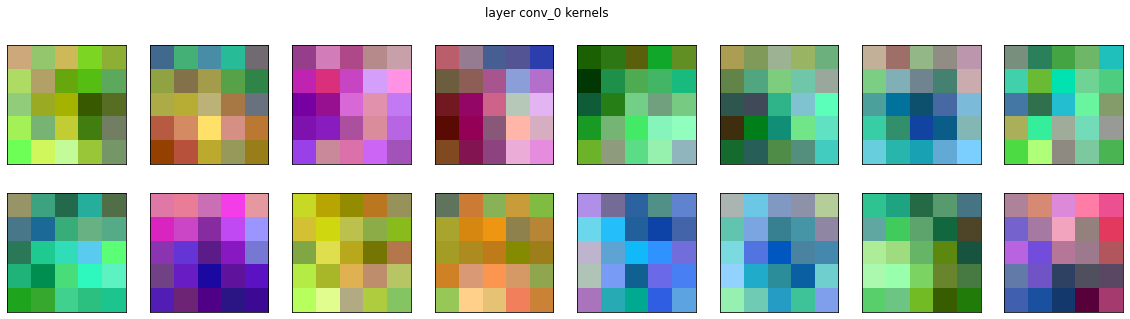

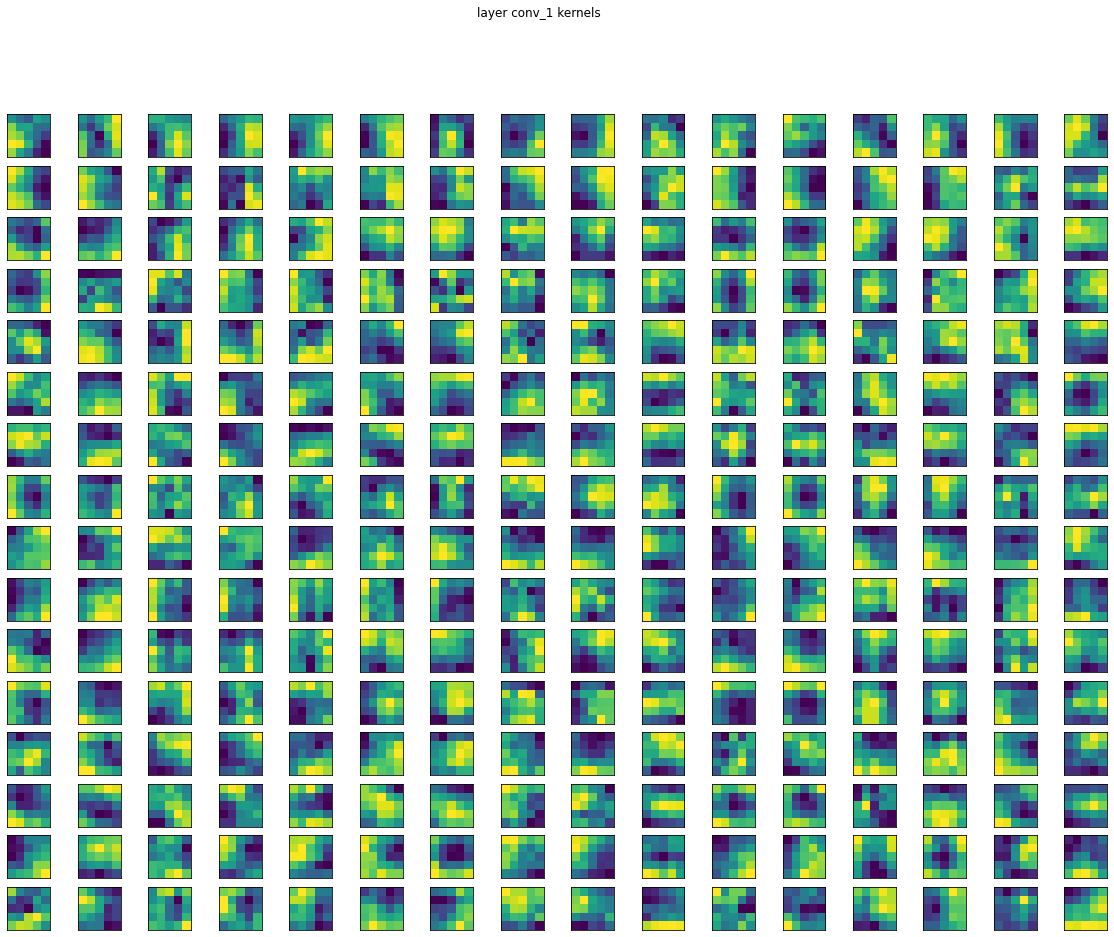

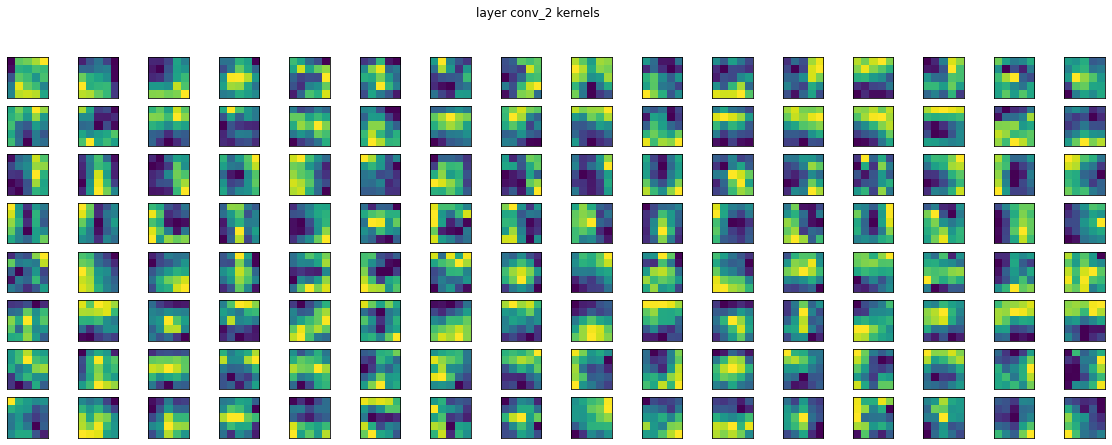

In [628]:
#!g1.2
def conv_kernels(conv_model):
    with torch.no_grad():
        first = True
        for name, param in list(conv_model.named_parameters()):
            sp = name.split('.')
            np_data = np.copy(param.data.numpy())
            if sp[-1] == 'weight' and 'conv' in sp[1]:
                if first:
                    W = 8
                    H = np.ceil(np_data.shape[0] / W).astype(np.int)
                    fig, ax = plt.subplots(H, W, figsize=(20, 5))
                    fig.suptitle(f'layer {sp[1]} kernels')
                    for img_i in range(np_data.shape[0]):
                        plt.subplot(H, W, img_i+1)
                        plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
                        img_ = np_data[img_i].transpose(1, 2, 0)
                        img_ -= np.min(img_)
                        img_ /= np.max(img_)
                        plt.imshow(img_)
                    plt.show()
                    first = False
                else:
                    H = np_data.shape[0]
                    W = np_data.shape[1]
                    fig, ax = plt.subplots(H, W, figsize=(20, H - 1))
                    fig.suptitle(f'layer {sp[1]} kernels')
                    plt.xlabel('input channels')
                    plt.ylabel('output channels')
                    
                    for i in range(H):
                        for j in range(W):
                            plt.subplot(H, W, i*W + j + 1)
                            plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
                            plt.imshow(np_data[i, j])
                    plt.show()

conv_kernels(model[mt_conv])

### 6.3 t-SNE

In [711]:
#!g1.2
from sklearn.manifold import TSNE

def plot_tsne(model_, val_loader, pre_output=True, random_state=19):
    if pre_output:
        new_model = nn.Sequential(*list(model_.net.children())[:-2])
    else:
        new_model = nn.Sequential(*list(model_.net.children()))
    for param in new_model.parameters():
        param.requires_grad = False
    
    internal_vectors = []
    all_targets = []
    
    with torch.no_grad():
        for images, targets in tqdm(val_loader):
            images = images.to(device)
            out = new_model(images)
            
            internal_vectors.append(out.detach().numpy())
            all_targets.append(targets.numpy())
    
    internal_vectors = np.concatenate(internal_vectors, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    
    tsne_vecs = TSNE(
        n_components=2,
#         verbose=3,
        init='pca',
        random_state=random_state,
        n_iter=2000,
        n_jobs=-1
    ).fit_transform(internal_vectors)
    
    return tsne_vecs, all_targets

In [708]:
#!g1.2
%%time
clear_output(True)
print('starting convolutional t-sne')
vecs_conv, tgts_conv = plot_tsne(model[mt_conv], val_dataloaders[chosen_dataset])
print('starting linear t-sne')
vecs_lin, tgts_lin = plot_tsne(model[mt_lin], val_dataloaders[chosen_dataset])
print('finished')

starting convolutional t-sne

starting linear t-sne

finished
CPU times: user 47min 53s, sys: 8.67 s, total: 48min 2s
Wall time: 6min 17s


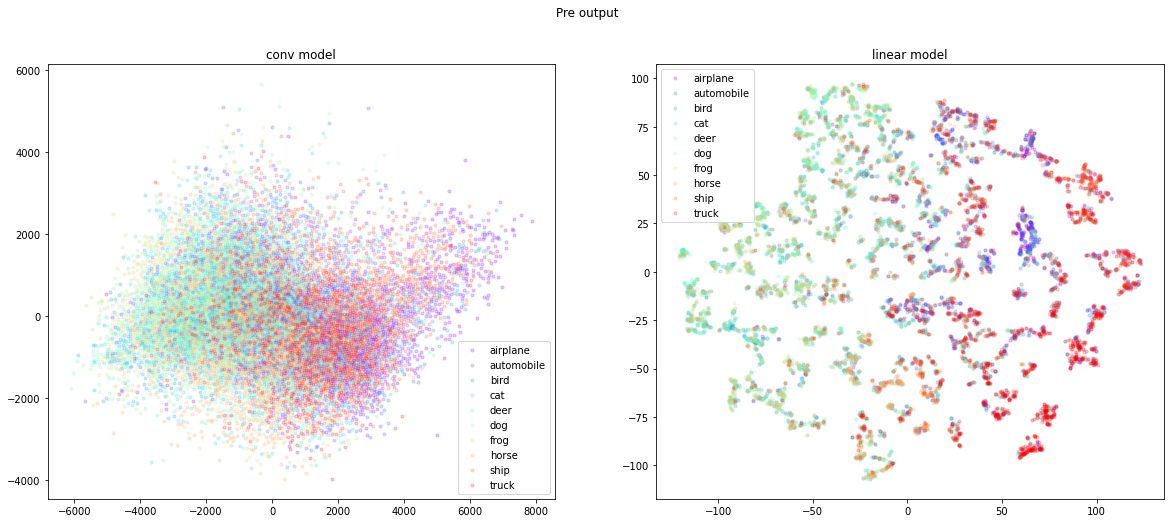

In [725]:
#!g1.2
import matplotlib.cm as cm

alpha = 0.2
s = 10

n_cl = len(classes[chosen_dataset])
colors = cm.rainbow(np.linspace(0, 1, n_cl))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Pre output')

plt.subplot(121)
plt.title('conv model')
for g in np.unique(tgts_conv):
    ix = np.where(tgts_conv == g)
    plt.scatter(vecs_conv[ix,0], vecs_conv[ix,1], color=colors[g], label=classes[chosen_dataset][g], s=s, alpha=alpha)
plt.legend()


plt.subplot(122)
plt.title('linear model')
for g in np.unique(tgts_lin):
    ix = np.where(tgts_lin == g)
    plt.scatter(vecs_lin[ix,0], vecs_lin[ix,1], color=colors[g], label=classes[chosen_dataset][g], s=s, alpha=alpha)
plt.legend()

plt.show()

In [714]:
#!g1.2
%%time
clear_output(True)
print('starting convolutional t-sne')
vecs_conv_, tgts_conv_ = plot_tsne(model[mt_conv], val_dataloaders[chosen_dataset], False)
print('starting linear t-sne')
vecs_lin_, tgts_lin_ = plot_tsne(model[mt_lin], val_dataloaders[chosen_dataset], False)
print('finished')

starting convolutional t-sne

starting linear t-sne

finished
CPU times: user 15min 38s, sys: 8.1 s, total: 15min 46s
Wall time: 2min 46s


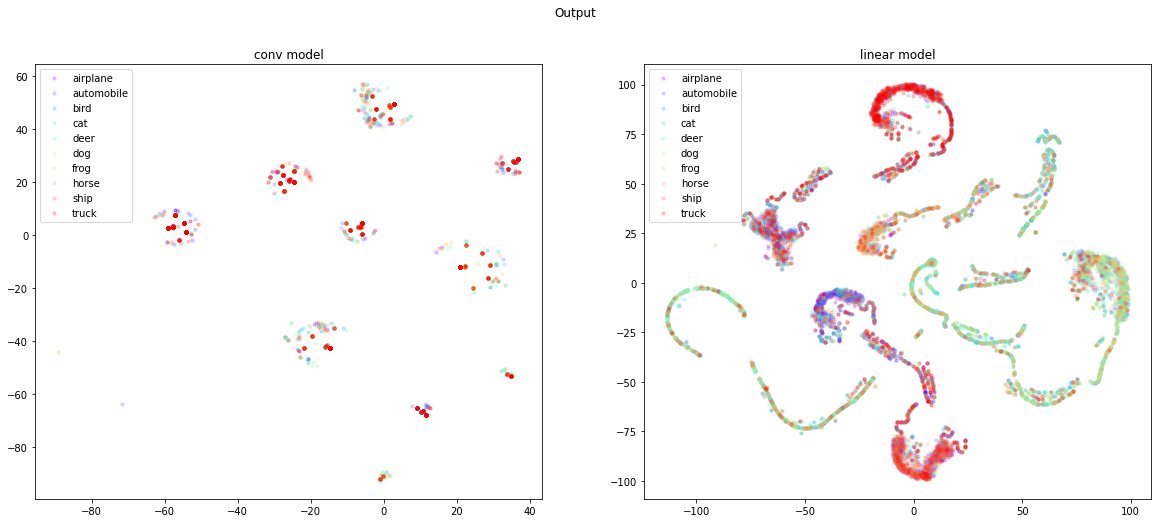

In [726]:
#!g1.2
import matplotlib.cm as cm

alpha = 0.2
s = 10

n_cl = len(classes[chosen_dataset])
colors = cm.rainbow(np.linspace(0, 1, n_cl))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Output')

plt.subplot(121)
plt.title('conv model')
for g in np.unique(tgts_conv_):
    ix = np.where(tgts_conv_ == g)
    plt.scatter(vecs_conv_[ix,0], vecs_conv_[ix,1], color=colors[g], label=classes[chosen_dataset][g], s=s, alpha=alpha)
plt.legend()


plt.subplot(122)
plt.title('linear model')
for g in np.unique(tgts_lin_):
    ix = np.where(tgts_lin_ == g)
    plt.scatter(vecs_lin_[ix,0], vecs_lin_[ix,1], color=colors[g], label=classes[chosen_dataset][g], s=s, alpha=alpha)
plt.legend()

plt.show()

## 7. What else can we do to improve convolutional model's quality?

### 7.1 Image preprocessing

Data preprocessings and augumentations are very important

Always think about how this exact transformation will affect input image and would this help or not

https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py $\longrightarrow$ examples

https://pytorch.org/vision/stable/transforms.html $\longrightarrow$ pytorch transforms documentation

- **Normalization** $\longrightarrow$ extremely important in terms of learning stability
- **Resize** $\longrightarrow$ can be used in a lot of various ways, but most oftenly used to make all the
- **Crops**
- **Flips**
- **Blur**
- **Turn**
- **Grayscale**
- **Brightness/colors/...**

### 7.2 Special tricks

- **Residual connections** $\longrightarrow$ especially important for deep NN, helps avoiding vanishing gradient
- **Layer normalization** $\longrightarrow$ helps avoiding exploding or vanishing gradients, makes learning more stable
- **Max/average poolings** $\longrightarrow$ computationally cheap and easy way of reducing dimensionality of current image, while preserving data. Also is non-linear layer, works really well (emperically) with ReLU activations
- **Global poolings** $\longrightarrow$ can be used instead of flatten + linear head, in terms of convNN is's bettter, because logically it's more important if we found the pattern or not, instead of is's final position. Second important advantage of global pooling - input images can be not of the same size. Also all benefits of poolings are still applied here
- **Adding random noise to the image** $\longrightarrow$ regularization technique

### 7.3 Finetuning & Transfer learning

We can take some big and already trained model (e.g. resnet) and finetune it

**Finetuning** $\longrightarrow$ initializing model from model already trained on simmiliar task with (may be) additional head at the end, then training this model with lower learning rate on our data

Or we can use transfer learning

**Transfer learning** $\longrightarrow$ removing head, freezing most of the parameters (may be except a few last layers) and changing the head to our needs. Then training this model (but in fact just the new head) on our data

In [734]:
#!g1.2
from torchvision import models

ft_model = models.resnet18(pretrained=True, progress=True)

ft_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [736]:
#!g1.2

# If you want transfer learning instead of finetuning:
# -----vvv-----
for name, param in ft_model.named_parameters():
    param.requires_grad = False
# -----^^^-----

# here you set your own number of classes
num_classes = 10

# getting input size
input_features = ft_model.fc.in_features

# changing final classificator
ft_model.fc = nn.Linear(input_features, num_classes)

In [737]:
#!g1.2
ft_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 8. Teaser of what else can be done with convolutional layers

## 9. CelebA - you can try this out (individual work)

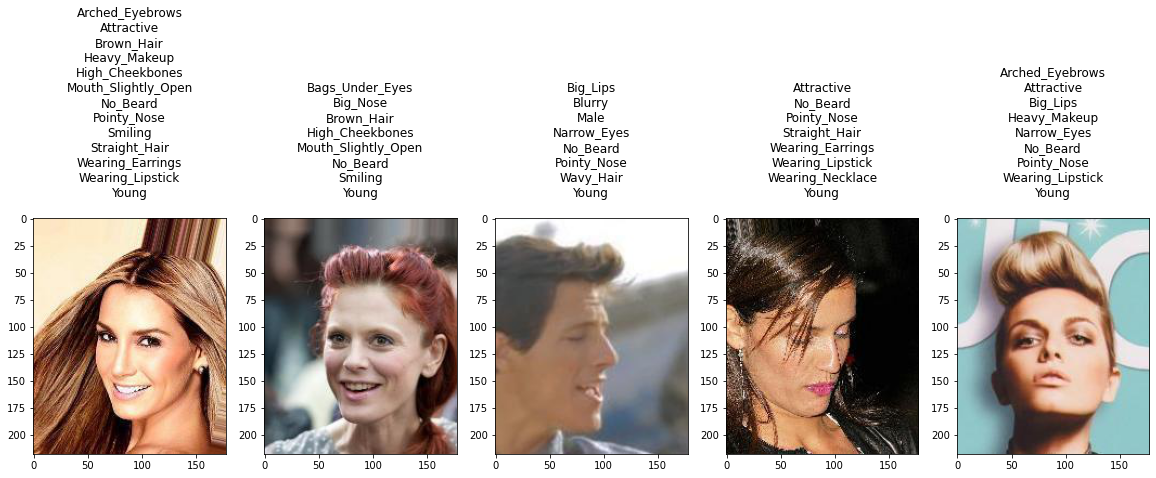

In [87]:
#!g1.2
k_show = 5
fig, ax = plt.subplots(1, k_show, figsize=(20, 7))
for k, el in enumerate(data['CelebA']):
    if k >= k_show:
        break
    plt.subplot(1, k_show, k+1)
    plt.imshow(el[0])
    attrs = ''
    for i, attr in enumerate(el[1]):
        if attr:
            attr_i = data['CelebA'].attr_names[i]
            attrs += f'{attr_i}\n'
    plt.title(attrs)
plt.show()